### Import tf and matplotlib

In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

### Load MNIST Data

In [18]:
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets('MNIST_data/', one_hot=True)
#mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### Placeholders for data and output

In [19]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

### weight and bias initialization 

In [20]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

### Convolution and Pooling

It is always good to create helper functions to initialize network layers in the future.

In [21]:
def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME') 
 
def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

### First Convolutional Layer (Now construction of graph begins)

In [22]:
#initialize weights and bias of first convolutional layer
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

In [23]:
x_image = tf.reshape(x, [-1,28,28,1])  # reshape x into a 4D tensor of shape [batch, height, width, color_channels]

In [24]:
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

### Second Convolutional Layer

In [25]:
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

### Densely Connected Layer

In [26]:
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

### Dropout - avoid overfitting

In [27]:
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

### Readout Layer

In [28]:
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

### Train and Evaluate the Model

This is where we start the session to run the graph and train the neural net 

step 0, training accuracy 0.14
step 100, training accuracy 0.88
step 200, training accuracy 0.8
step 300, training accuracy 0.88
step 400, training accuracy 0.94
step 500, training accuracy 0.96
step 600, training accuracy 0.9
step 700, training accuracy 0.94
step 800, training accuracy 0.98
step 900, training accuracy 0.94
step 1000, training accuracy 0.98
step 1100, training accuracy 0.92
test accuracy 0.9678


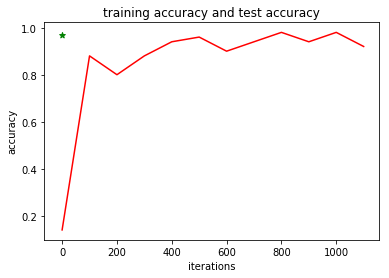

In [34]:
with tf.Session() as sess: 
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_conv, labels=y_))
    train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy) #Gradient descent optimizer
    #train_step = tf.train.AdamOptimizer(0.01).minimize(cross_entropy) #Adam optimizer usage
    correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    sess.run(tf.global_variables_initializer())
    step, acc = [],[]
    for i in range(1200): #number of steps
      batch = mnist.train.next_batch(50) #50 is the default batch size
      if i%100 == 0:
        train_accuracy = accuracy.eval(feed_dict={
            x:batch[0], y_: batch[1], keep_prob: 1.0})
        print("step %d, training accuracy %g"%(i, train_accuracy))
        step.append(i)
        acc.append(train_accuracy)
      train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

    accuracy = accuracy.eval(feed_dict={
        x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}) #notice for testing we dont do any dropout(keep_prob=1)
    print("test accuracy %g"%accuracy) 
    
    plt.plot(step,acc,color='red')
    plt.scatter([0],accuracy,color='green',marker='*')
    plt.xlabel("iterations")
    plt.ylabel("accuracy")
    plt.title('training accuracy and test accuracy')